In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping


2023-12-28 11:18:13.092790: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data_dir = '/Users/patry/Desktop/jellyfish_env/jellyfish_cv'

/var/folders/fl/m9y18vxd24lf1tgmyqxdp0sh0000gn/T/ipykernel_67023/81984277.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


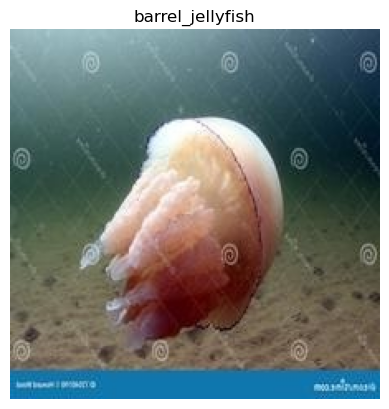

In [3]:
# Empty images and labels initialization
images = []
labels = []

# Collecting subfolders list
subfolders = [f.path for f in os.scandir(data_dir) if f.is_dir()]

# Loop through every single subfolder
for subfolder in subfolders:
    # Collecting spicies name from subfolder name
    label = os.path.basename(subfolder)
    
    #Collecting files list of images from subfolder
    image_files = [os.path.join(subfolder, filename) for filename in os.listdir(subfolder) if filename.endswith('.jpg')]
    
    # Going through every image file in subfolders
    for image_file in image_files:
        #Reading image using OpenCV
        image = cv2.imread(image_file)
        
        #Adding image and label to the lists
        images.append(image)
        labels.append(label)
        
#Change list to numpy arrays
images = np.array(images)
labels = np.array(labels)

#Displaying random image and its label
sample_index = 0
plt.imshow(cv2.cvtColor(images[sample_index], cv2.COLOR_BGR2RGB))
plt.title(labels[sample_index])
plt.axis('off')
plt.show()


In [4]:
# Dictionary for appereance counting different size of images in subfolders
size_counter = {}


#Going through every single subfolder
for subfolder in subfolders:
    print(f"\nSubfolder analyzis : {os.path.basename(subfolder)}")
    
    #Going through every image file in subfolder
    for image_file in image_files:
        #Reading image 
        image = cv2.imread(image_file)
        
        #Collecting image size
        heigh, width, _ = image.shape
        
        #Dictionary update counting image sizes in subfolder
        size_key =(heigh, width)
        size_counter[subfolder] = size_counter.get(subfolder,{})
        size_counter[subfolder][size_key] = size_counter[subfolder].get(size_key, 0) + 1
        
#Results display
for subfolder, sizes in size_counter.items():
    print(f"\nSubfolder: {os.path.basename(subfolder)}")
    for size, count in sizes.items():
        print(f"\Size: {size}, Images number: {count}")


Subfolder analyzis : barrel_jellyfish

Subfolder analyzis : Train_Test_Valid

Subfolder analyzis : lions_mane_jellyfish

Subfolder analyzis : blue_jellyfish

Subfolder analyzis : mauve_stinger_jellyfish

Subfolder analyzis : Moon_jellyfish

Subfolder analyzis : compass_jellyfish

Subfolder: barrel_jellyfish
\Size: (224, 224), Images number: 101
\Size: (179, 179), Images number: 37

Subfolder: Train_Test_Valid
\Size: (224, 224), Images number: 101
\Size: (179, 179), Images number: 37

Subfolder: lions_mane_jellyfish
\Size: (224, 224), Images number: 101
\Size: (179, 179), Images number: 37

Subfolder: blue_jellyfish
\Size: (224, 224), Images number: 101
\Size: (179, 179), Images number: 37

Subfolder: mauve_stinger_jellyfish
\Size: (224, 224), Images number: 101
\Size: (179, 179), Images number: 37

Subfolder: Moon_jellyfish
\Size: (224, 224), Images number: 101
\Size: (179, 179), Images number: 37

Subfolder: compass_jellyfish
\Size: (224, 224), Images number: 101
\Size: (179, 179), I

In every single folder there are two size of images:
(224,224)px and (179,179)px .
Smaler images has to be upscaled to (224, 224)px, this process will allow to keep some important details of the image.


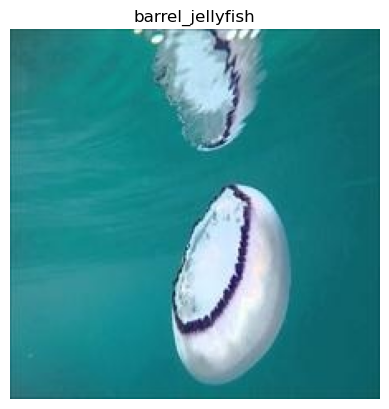

In [5]:
# Collecting subfolders list
subfolders = [f.path for f in os.scandir(data_dir) if f.is_dir()]

#Size of the image to upscale:
new_size = (224, 224)

# Initialization of empty lists and labels

images = []
labels = []

#Going thrue every single subfolder

for subfolder in subfolders:
    #Collecting spiceis name from subfolder
    label = os.path.basename(subfolder)
    
    #Collecting list of image files in current subfolder
    image_files = [os.path.join(subfolder, filename) for filename in os.listdir(subfolder) if filename.endswith('.jpg')]
    
    #Going through every single image file in subfolder
    for image_file in image_files:
        #Read image
        image = cv2.imread(image_file)
        
        #Rescaling image to new size
        resized_image = cv2.resize(image, new_size)
        
        #Adding rescaled image and label to the lists
        
        images.append(resized_image)
        labels.append(label)

#Change lists to numpy arrays
images = np.array(images)
labels = np.array(labels)
#Display of rescaled random image and its label
sample_index = np.random.randint(1,100)
plt.imshow(cv2.cvtColor(images[sample_index], cv2.COLOR_BGR2RGB))
plt.title(labels[sample_index])
plt.axis('off')
plt.show()

In [6]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the labels to numerical values
numerical_labels = label_encoder.fit_transform(labels)

In [7]:
# Dataset division for train and test 
X_train, X_temp, y_train, y_temp = train_test_split(images, numerical_labels, test_size = 0.2, random_state = 42)

# Dataset division for validation and test
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#Display amount of images in every set
print(f"Amount of images in training set:{len(X_train)}")
print(f"Amount of images in validation set:{len(X_valid)}")
print(f"Amount of images in test set:{len(X_test)}")


Amount of images in training set:682
Amount of images in validation set:85
Amount of images in test set:86


In [8]:
#Pixels normalization
X_train_normalized = X_train / 255.0
X_valid_normalized = X_valid / 255.0
X_test_normalized = X_test / 255.0

In [9]:
# Print sizes before augmentation
print(f"Size of X_train_normalized before augmentation: {len(X_train_normalized)}")
print(f"Size of y_train before augmentation: {len(y_train)}")

# Generating object ImageDataGenerator with restricted augmentation
datagen = ImageDataGenerator(
    rotation_range=90,
    horizontal_flip=True
)

# Preparing training data for augmentation
augmented_images = []
augmented_labels = []

for i in range(len(X_train_normalized)):
    img = X_train_normalized[i].reshape((1,) + X_train_normalized[i].shape)
    generated_images = datagen.flow(img, batch_size=1)
    augmented_image = generated_images[0][0]
    augmented_images.append(augmented_image)
    augmented_labels.append(y_train[i])

# Augmented list conversion to numpy array
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Adding augmented images to training set
X_train_combined = np.concatenate((X_train_normalized, augmented_images))
y_train_combined = np.concatenate((y_train, augmented_labels))

# Display sizes after augmentation
print(f"Size of X_train_combined after augmentation: {len(X_train_combined)}")
print(f"Size of y_train_combined after augmentation: {len(y_train_combined)}")


Size of X_train_normalized before augmentation: 682
Size of y_train before augmentation: 682
Size of X_train_combined after augmentation: 1364
Size of y_train_combined after augmentation: 1364


In [11]:
#Define the CNN model

model_1 = models.Sequential()

#Convolutional layers
model_1.add(layers.Conv2D(32, (3,3), activation="relu", input_shape = (224, 224, 3)))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(64, (3,3), activation="relu"))
model_1.add(layers.MaxPooling2D((2,2)))
model_1.add(layers.Conv2D(128, (3,3), activation="relu"))
model_1.add(layers.MaxPooling2D((2,2)))

#Flatten layer to transition from convolutioal to dense layer
model_1.add(layers.Flatten())

#Dense layers
model_1.add(layers.Dense(128, activation="relu"))
model_1.add(layers.Dropout(0.6)) #Adding dropout for regularization
model_1.add(layers.Dense(6, activation="softmax")) # Assuming there are 6 classes of jellyfish

#Compile the model
model_1.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

#Display the model summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 128)      

Epoch 1/10
43/43 [==============================] - 58s 1s/step - loss: 1.8310 - accuracy: 0.2639 - val_loss: 46.2068 - val_accuracy: 0.4000
Epoch 2/10
43/43 [==============================] - 53s 1s/step - loss: 1.5027 - accuracy: 0.3812 - val_loss: 66.0101 - val_accuracy: 0.4235
Epoch 3/10
43/43 [==============================] - 54s 1s/step - loss: 1.3113 - accuracy: 0.4663 - val_loss: 99.5843 - val_accuracy: 0.5176
Epoch 4/10
43/43 [==============================] - 61s 1s/step - loss: 1.1216 - accuracy: 0.5623 - val_loss: 104.4181 - val_accuracy: 0.5412
Epoch 5/10
43/43 [==============================] - 51s 1s/step - loss: 0.9389 - accuracy: 0.6334 - val_loss: 141.2902 - val_accuracy: 0.6824
Epoch 6/10
43/43 [==============================] - 56s 1s/step - loss: 0.8220 - accuracy: 0.7045 - val_loss: 102.1721 - val_accuracy: 0.6824
Epoch 7/10
43/43 [==============================] - 50s 1s/step - loss: 0.6486 - accuracy: 0.7595 - val_loss: 136.3756 - val_accuracy: 0.6471
Epoch 8/1

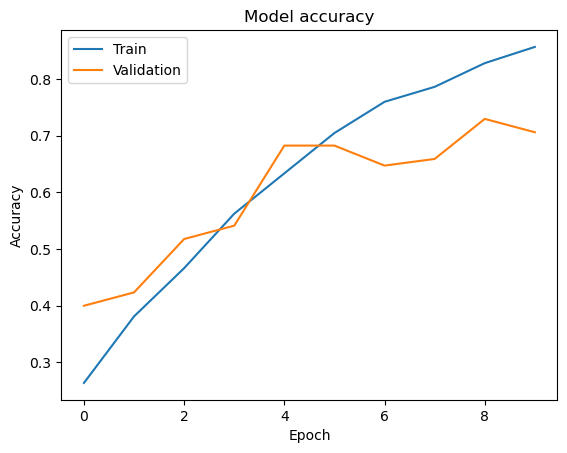

In [22]:
# Train the model
history = model_1.fit(X_train_combined, y_train_combined, epochs=10, validation_data=(X_valid, y_valid))

# Evaluate the model on the test set
test_loss, test_accuracy = model_1.evaluate(X_test, y_test)

# Display test accuracy
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Plot training history (optional)
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [10]:
# Preparing training data for augmentation
augmented_images = []
augmented_labels = []

for i in range(len(X_train_combined)):
    img = X_train_combined[i].reshape((1,) + X_train_combined[i].shape)
    generated_images = datagen.flow(img, batch_size=1)
    augmented_image = generated_images[0][0]
    augmented_images.append(augmented_image)
    augmented_labels.append(y_train_combined[i])

# Augmented list conversion to numpy array
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Adding augmented images to training set
X_train_combined2 = np.concatenate((X_train_combined, augmented_images))
y_train_combined2 = np.concatenate((y_train_combined, augmented_labels)
        )
# Display sizes before augmentation
print(f"Size of X_train_combined before augmentation: {len(X_train_combined)}")
print(f"Size of y_train_combined before augmentation: {len(y_train_combined)}")


# Display sizes after augmentation

print(f"Size of X_train_combined2 after augmentation: {len(X_train_combined2)}")
print(f"Size of y_train_combined2 after augmentation: {len(y_train_combined2)}")


Size of X_train_combined before augmentation: 1364
Size of y_train_combined before augmentation: 1364
Size of X_train_combined2 after augmentation: 2728
Size of y_train_combined2 after augmentation: 2728


In [33]:
from tensorflow.keras import models, layers

# Define the CNN model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer to transition from convolutional to dense layer
model.add(layers.Flatten())

# Dense layers with increased dropout
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dropout(0.3))  # Increased dropout rate
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dropout(0.3))  # Increased dropout rate
model.add(layers.Dense(6, activation="softmax"))  # Assuming there are 6 classes of jellyfish

custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)


# Compile the model
model.compile(optimizer= custom_optimizer,
              
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Display the model summary
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 26, 26, 128)     

Epoch 1/10
43/43 [==============================] - 55s 1s/step - loss: 1.7962 - accuracy: 0.2683 - val_loss: 60.3274 - val_accuracy: 0.2941
Epoch 2/10
43/43 [==============================] - 45s 1s/step - loss: 1.4910 - accuracy: 0.3827 - val_loss: 120.5572 - val_accuracy: 0.4824
Epoch 3/10
43/43 [==============================] - 44s 1s/step - loss: 1.3730 - accuracy: 0.4531 - val_loss: 109.5612 - val_accuracy: 0.5412
Epoch 4/10
43/43 [==============================] - 44s 1s/step - loss: 1.1902 - accuracy: 0.5352 - val_loss: 86.4848 - val_accuracy: 0.6118
Epoch 5/10
43/43 [==============================] - 48s 1s/step - loss: 1.0451 - accuracy: 0.5960 - val_loss: 115.3764 - val_accuracy: 0.5882
Epoch 6/10
43/43 [==============================] - 46s 1s/step - loss: 0.8858 - accuracy: 0.6642 - val_loss: 129.9187 - val_accuracy: 0.6118
Epoch 7/10
43/43 [==============================] - 46s 1s/step - loss: 0.7150 - accuracy: 0.7324 - val_loss: 165.8009 - val_accuracy: 0.6706
Epoch 8/

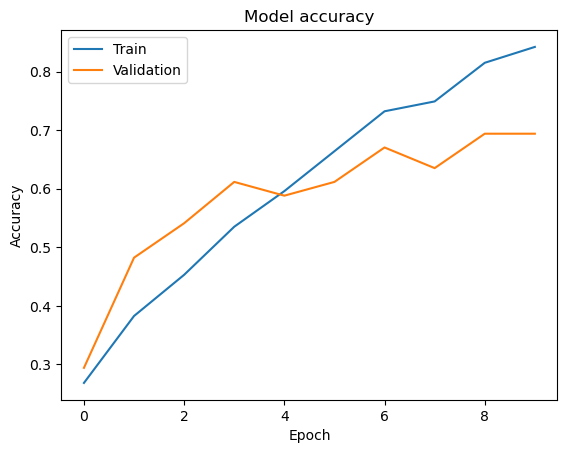

In [14]:
# # Define early stopping callback
# early_stopping = EarlyStopping(
#     monitor='val_loss',  # you can also use 'val_accuracy' or other metrics
#     patience=5,  # number of epochs with no improvement after which training will be stopped
#     restore_best_weights=True
# )

# Train the model
history = model.fit(X_train_combined, y_train_combined, epochs=10, validation_data=(X_valid, y_valid)#, callbacks=[early_stopping])
                   )

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test)

# Display test accuracy
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Plot training history (optional)
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [11]:
# Train the model
history = model.fit(X_train_normalized, y_train, epochs=10, validation_data=(X_valid_normalized, y_valid)#, callbacks=[early_stopping])
                   )

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test)

# Display test accuracy
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Plot training history (optional)
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

NameError: name 'model' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Function to create model
def create_model(learning_rate=0.001, dropout_rate=0.3):
    # Define the CNN model
    input_layer = layers.Input(shape=(224, 224, 3))
    
    # Convolutional layers
    x = layers.Conv2D(32, (3, 3), activation="relu")(input_layer)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation="relu")(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation="relu")(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Flatten layer to transition from convolutional to dense layer
    x = layers.Flatten()(x)

    # Dense layers with increased dropout
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(rate=dropout_rate)(x)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(rate=dropout_rate)(x)

    # Output layer
    output_layer = layers.Dense(6, activation="softmax")(x)  # Assuming there are 6 classes of jellyfish

    model = models.Model(inputs=input_layer, outputs=output_layer)

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Define the grid search parameters
learning_rates = [0.001, 0.01, 0.1]
dropout_rates = [0.3, 0.5, 0.7]

# Split data for stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

best_accuracy = 0
best_params = {}

# Manual grid search
for learning_rate in learning_rates:
    for dropout_rate in dropout_rates:
        accuracies = []
        for train_index, test_index in skf.split(X_train_combined2, y_train_combined2):
            X_train_fold, X_test_fold = X_train_combined2[train_index], X_train_combined2[test_index]
            y_train_fold, y_test_fold = y_train_combined2[train_index], y_train_combined2[test_index]
            
            model = create_model(learning_rate=learning_rate, dropout_rate=dropout_rate)
            model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)
            
            # Use predict method instead of predict_classes
            y_pred_prob = model.predict(X_test_fold)
            y_pred = np.argmax(y_pred_prob, axis=1)
            
            accuracy = accuracy_score(y_test_fold, y_pred)
            accuracies.append(accuracy)
        
        avg_accuracy = sum(accuracies) / len(accuracies)
        print(f'Learning Rate: {learning_rate}, Dropout Rate: {dropout_rate}, Accuracy: {avg_accuracy}')
        
        if avg_accuracy > best_accuracy:
            best_accuracy = avg_accuracy
            best_params = {'learning_rate': learning_rate, 'dropout_rate': dropout_rate}

print(f"Best Accuracy: {best_accuracy} using {best_params}")

29/29 [==============================] - 8s 279ms/step
Learning Rate: 0.001, Dropout Rate: 0.3, Accuracy: 0.776032914646776
29/29 [==============================] - 8s 280ms/step
Learning Rate: 0.001, Dropout Rate: 0.5, Accuracy: 0.6858339680121858
29/29 [==============================] - 8s 278ms/step
Learning Rate: 0.001, Dropout Rate: 0.7, Accuracy: 0.4468731488533469
29/29 [==============================] - 11s 360ms/step
Learning Rate: 0.01, Dropout Rate: 0.3, Accuracy: 0.1700874849389701
29/29 [==============================] - 10s 341ms/step
Learning Rate: 0.01, Dropout Rate: 0.5, Accuracy: 0.1700874849389701
29/29 [==============================] - 10s 325ms/step
Learning Rate: 0.01, Dropout Rate: 0.7, Accuracy: 0.17045418827597048
29/29 [==============================] - 8s 276ms/step
Learning Rate: 0.1, Dropout Rate: 0.3, Accuracy: 0.1678872649169679


In [35]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Assuming you have your features in X and labels in y
# X_train_combined2, y_train_combined2

# Define the number of folds for cross-validation
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Lists to store accuracy scores for each fold
accuracies = []

# Loop through the folds
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_combined2, y_train_combined2)):
    print(f"Fold {fold + 1}/{n_folds}")

    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_train_combined2[train_idx], X_train_combined2[val_idx]
    y_train_fold, y_val_fold = y_train_combined2[train_idx], y_train_combined2[val_idx]

    # Create and compile your CNN model
    input_layer = Input(shape=(224, 224, 3))
    x = Conv2D(32, (3, 3), activation="relu")(input_layer)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation="relu")(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation="relu")(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation="relu")(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation="relu")(x)
    x = Dropout(0.3)(x)
    output_layer = Dense(6, activation="softmax")(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    try:
        # Train the model on the training data for a fixed number of epochs
        model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)

        # Evaluate the model on the validation set
        y_pred = np.argmax(model.predict(X_val_fold), axis=-1)
        accuracy = accuracy_score(y_val_fold, y_pred)
        accuracies.append(accuracy)

        print(f"Validation Accuracy: {accuracy}")

    except Exception as e:
        print(f"Error in Fold {fold + 1}: {e}")

# Print the average accuracy across all folds
print(f"\nAverage Accuracy: {np.mean(accuracies)}")


Fold 1/5
18/18 [==============================] - 5s 259ms/step
Validation Accuracy: 0.7710622710622711
Fold 2/5
18/18 [==============================] - 5s 264ms/step
Validation Accuracy: 0.6684981684981685
Fold 3/5
18/18 [==============================] - 5s 251ms/step
Validation Accuracy: 0.7637362637362637
Fold 4/5
18/18 [==============================] - 5s 258ms/step
Validation Accuracy: 0.7541284403669725
Fold 5/5
18/18 [==============================] - 5s 292ms/step
Validation Accuracy: 0.7944954128440367

Average Accuracy: 0.7503841113015425
